### Submission guidelines

1. Fill in your name in the notebook in the top cell.
2. Fill in the gaps in the code where indicated. <br> Make sure that you:<br> - fill in any place that says "YOUR ANSWER HERE" <br>
3. Do **NOT remove any of the cells** of the notebook!
4. Discussion is allowed, but every student needs to hand a personal version of the lab. Plagiarism will be sanctioned!   
5. Before submitting, restart your kernel & **make sure that every cell runs**.<br>Code that doesn't run will not be scored.<br>The notebooks with all source code, and optional extra files need to be handed in using Ufora.<br> Make sure all your notebooks are already executed when you upload them (i.e. there should be output after the cells). 
6. **Zip** your lab assignment folder and name the archive: `Surname_Name.zip` <br> Keep the same folder structure as the provided lab assignment!<br><span style='color: red'>Do not rename any of the notebooks or files</span>!<br>

In [ ]:
NAME = """
Cesar Zapata
"""

**NOTE: In this lab, no code or implementation is required from your side. We provide in this lab a basic introduction to Docker and its capabilities. You will have to perform multiple commands to create and run Dockerized applications. Please, make sure you take your time to understand what every command does and what Docker is capable of based on this introductory lab. Your lab scores will be based on the answers to the different lab questions. Make sure you answer them all.** 

---

# Lab: Docker

Docker is a popular open-source platform that allows developers to easily create, deploy, and run applications in containers. Containers are lightweight, standalone packages that contain all the necessary dependencies, libraries, and configuration files needed to run an application. Docker simplifies the development and deployment process by isolating applications in containers, which can be easily moved between different environments and platforms. With Docker, developers can create and test applications in a consistent and reproducible environment, without worrying about compatibility issues or conflicts with other applications. This makes it an ideal solution for building and deploying applications across a wide range of platforms and environments, including cloud, on-premises, and hybrid environments. In this way, Docker has revolutionized the way developers build and deploy applications, enabling them to focus on creating high-quality software without the complexity of traditional deployment processes.

![docker meme](https://external-preview.redd.it/aR6WdUcsrEgld5xUlglgKX_0sC_NlryCPTXIHk5qdu8.jpg?auto=webp&s=5fe64dd318eec71711d87805d43def2765dd83cd)

In this lab, we will look at some basic Docker commands and a simple build-ship-run workflow. We'll start by running some simple containers, then we'll use a Dockerfile to build a custom app. Finally, we'll look at how to use bind mounts to modify a running container as you might if you were actively developing using Docker.

> * [Task 0: Prerequisites](#Task_0)
> * [Task 1: Run some simple Docker containers](#Task_1)
> * [Task 2: Package and run a custom app using Docker](#Task_2)
> * [Task 3: Using Docker Compose](#Task_3)

## <a name="task0"></a>Task 0: Prerequisites

While Docker can be installed on your local machine, it can be challenging to set up and configure correctly. Therefore, we will be using an online sandbox environment for our purposes. An online sandbox environment provides a pre-configured Docker environment, allowing you to quickly and easily experiment with Docker without having to worry about setting up the environment yourself. This approach has several advantages, including a reduced learning curve, faster development cycles, and the ability to collaborate with others in a shared environment.

To access this sandbox environment, you will require a DockerID:

### Make sure you have a DockerID

If you do not have a DockerID (a free login used to access Docker Hub), please visit [Docker Hub](https://hub.docker.com) and register for one. You will need this for later steps.

### Start the sandbox environment
Open a new browser tab and go to: [https://labs.play-with-docker.com/#](https://labs.play-with-docker.com/#).<br>
Click start and login with your DockerID. You should see something similar to the window below:

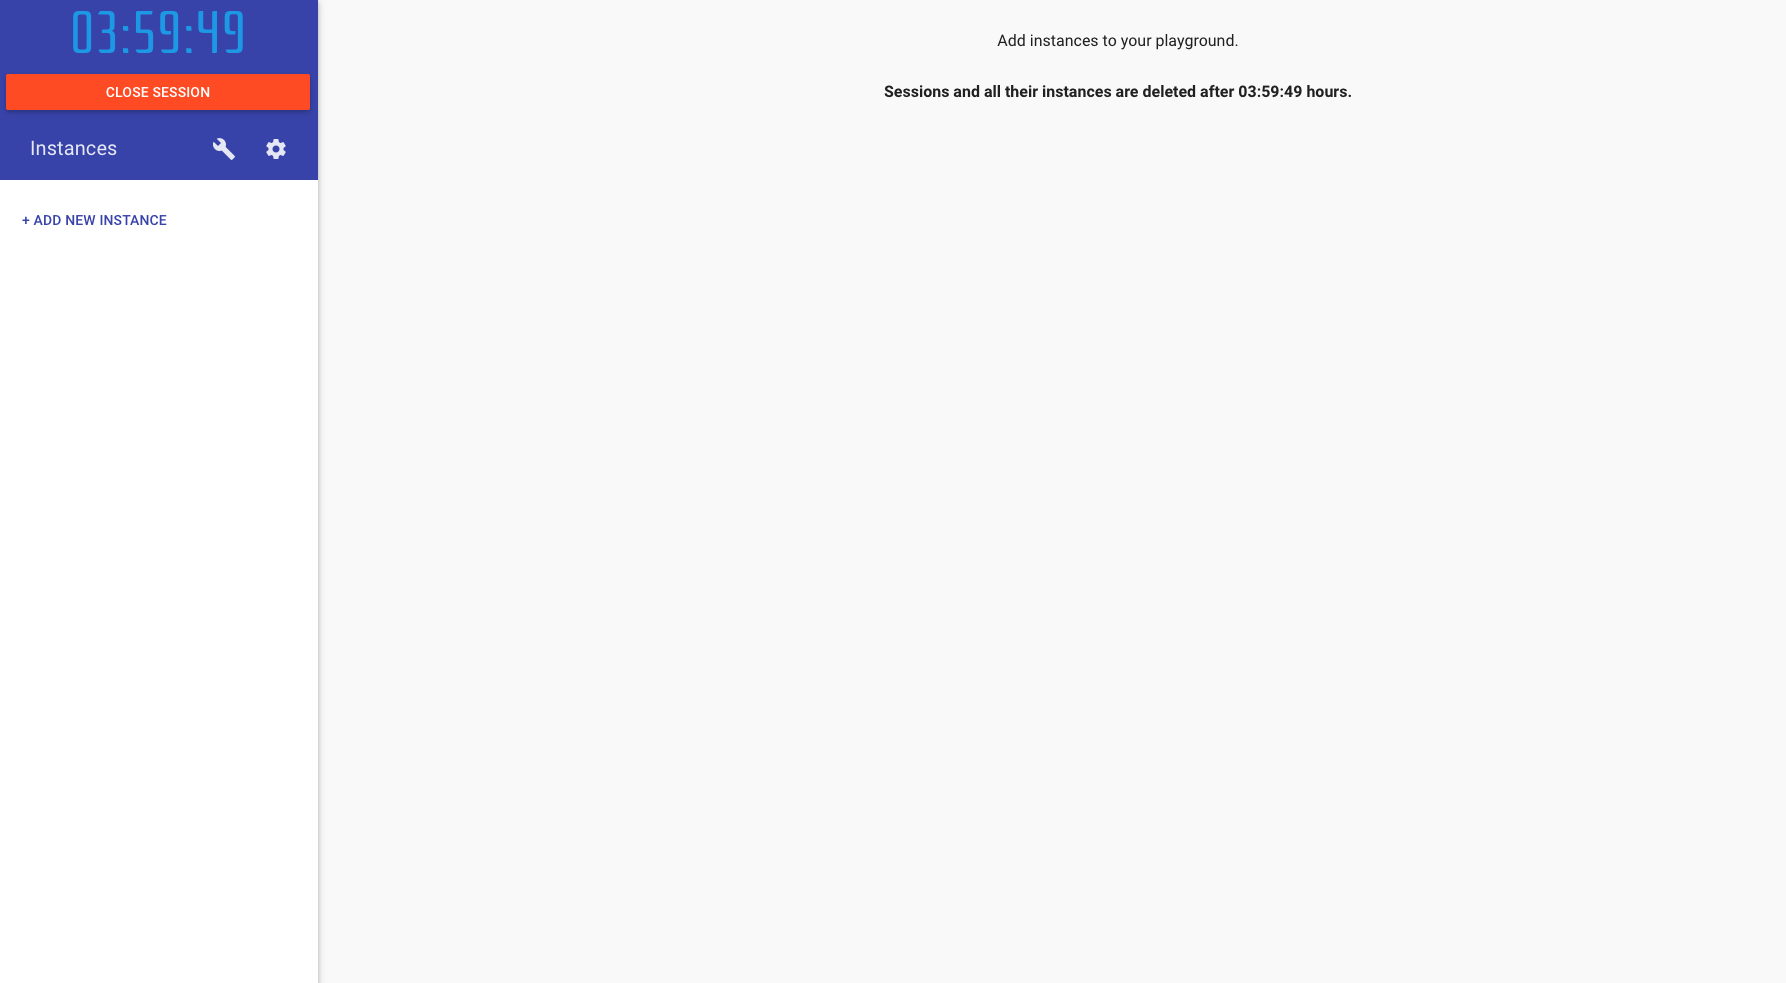

### Start a new instance

In this sandbox environment, click on the left '+ ADD NEW INSTANCE' button. This will create for you a virtual machine instance. Docker is installed and available for you in this virtual machine. The sandbox environment also shows the IP adress of this virtual machine, the memory consumption and the CPU usage.

**Note: this sandbox environment is available for 4 hours and you see a clock exposing the amount of time left. In theory, this lab can be finished in less then 4 hours easily. You can always restart your sandbox environment to reset the whole environment, but keep in mind that you will have to redo some parts of the lab as resources will be reset.**

## <a name="Task_1"></a>Task 1: Run some simple Docker containers

There are different ways to use containers. These include:

1. **To run a single task** 
2. **Interactively** 
3. **In the background** 

In this section you'll try each of those options and see how Docker manages the workload.

### Run a single task in an Alpine Linux container

In this step we're going to start a new container and tell it to run the `hostname` command. The container will start, execute the `hostname` command, then exit.

To copy commands into the docker playground terminal, you can do the following:

On macOS: `cmd + v`

On windows: `ctrl + shift + v`

1. Run the following command in your Linux console.

    ```.term1
    docker container run alpine hostname
    ```
    
    The `docker container run` command is used to start a new container from a Docker image. In this case, the image being used is alpine, which is a lightweight Linux distribution often used for Docker containers. The command `hostname` is a Linux command that is used to print the hostname of the current machine. So, when the command docker container run alpine hostname is executed, Docker will start a new container based on the alpine image and execute the hostname command inside the container. The output of the hostname command will be printed to the console.
    
    The output below shows that the `alpine:latest` image could not be found locally. When this happens, Docker automatically *pulls* it from Docker Hub. Docker Hub is a cloud-based registry service that allows developers to store and share Docker images. Docker images are pre-configured packages that contain all the dependencies, libraries, and configuration files needed to run an application. By uploading Docker images to Docker Hub, developers can easily share their applications with others, collaborate with other developers, and access a wide range of pre-built images from the Docker community.
    
    After the image is pulled, the container's hostname is displayed.
    

2. Docker keeps a container running as long as the process it started inside the container is still running. In this case the `hostname` process exits as soon as the output is written. This means the container stops. However, Docker doesn't delete resources by default, so the container still exists in the `Exited` state.

    List all containers.

    ```.term1
    docker container ls --all
    ```

    Notice that your Alpine Linux container is in the `Exited` state.

    > **Note:** The container ID *is* the hostname that the container displayed. So the the container's hostname is displayed at step 1 should be the same as the container id listed by the `docker container ls --all` command.

**QUESTION1: What is an image? What is the difference between an image and a docker container?**

In [ ]:
ANSWER1="""
An image refers to a file that contains a set of instructions for creating a container that can run on the Docker platform.
It contains application code, tools, dependencies, libraries, and everything that is required to make an application run.
Images ar immutable (they can not be cahnged), which allows cross-platform development, as every development team will have the same 
environment running in the same instance.

A container is an isolated space where an application can run without affecting the rest of the system, and without the system impacting
the application. 

Images execute code in a container. One can think of a container as a running image, as images become containers at runtime (in case of Docker
when they start running on Docker Engine). 
"""

### Run an interactive Ubuntu container

You can run a container based on a different version of Linux than is running on your Docker host.

In the next example, we are going to run an Ubuntu Linux container

1. Run a Docker container and access its shell.

    ```.term1
    docker container run --interactive --tty --rm ubuntu bash
    ```    

**QUESTION2: Explain in own words each part of the above command**

In [ ]:
ANSWER2="""
The command can be separated by parts:
docker container run -> initialize the docker container with the characteristics mentioned in the next parts
--interactive -> means the developer can execute commands in the container while it is running
--tty -> use a virtual terminal (console) session within the container
--rm -> the container will be removed automatically after docker is closed
ubuntu -> operating sistem to be used (linux, distribution ubuntu)
bash -> shell to be used
"""

When the container starts you'll drop into the bash shell with the default prompt `root@<container id>:/#`. Docker has attached to the shell in the container, relaying input and output between your local session and the shell session in the container.

2. Run the following commands in the container.

    `ls /` will list the contents of the root directory in the container, `ps aux` will show running processes in the container, `cat /etc/issue` will show which Linux distro the container is running.

   ```.term1
   ls /
   ```

   ```.term1
   ps aux
   ```

   ```.term1
   cat /etc/issue
   ```



**QUESTION3: What is the Linux distro of this container?**

In [ ]:
ANSWER3 = """
ubuntu 22.04.2 LTS
"""

3. Type ```exit``` to leave the shell session. This will terminate the `bash` process, causing the container to exit.

    ```.term1
    exit
    ```

    > **Note:** As we used the `--rm` flag when we started the container, Docker removed the container when it stopped. This means if you run another `docker container ls --all` you won't see the Ubuntu container.


### Run a background MySQL database

Here's a simple example to run a MySQL database in background using Docker.

1. Run a new MySQL container with the following command.

    ```.term1
    docker container run \
    --detach \
    --name mydb \
    -e MYSQL_ROOT_PASSWORD=my-secret-pw \
    mysql:latest
    ```

    * `--detach` will run the container in the background.
    * `--name` will name it **mydb**.
    * `-e` will use an environment variable to specify the root password (NOTE: This should never be done in production).

    As the MySQL image was not available locally, Docker automatically pulled it from Docker Hub.
    As long as the MySQL process is running, Docker will keep the container running in the background.
    

2. List the running containers.

    ```.term1
    docker container ls
    ```

    Notice your container is running.
    

3. You can check what's happening in your containers by using a couple of built-in Docker commands: `docker container logs` and `docker container top`.

    ```.term1
    docker container logs mydb
    ```

    This shows the logs from the MySQL Docker container.
    
    Let's look at the processes running inside the container.

    ```.term1
    docker container top mydb
    ```

    You should see the MySQL daemon (`mysqld`) is running in the container.

    Even though MySQL is running inside the Docker container, it cannot be accessed from the host machine or from other containers unless the network ports are explicitly published. By default, containers are isolated from the host machine and other containers, and network traffic cannot flow between them. To enable communication between the MySQL container and the host machine or other containers, you need to publish the network ports using the docker container run command. This can be done by specifying the -p or --publish flag followed by the port number to publish. For example, `docker container run -p 3306:3306 mysql` will publish port 3306 in the MySQL container to port 3306 on the host machine, allowing traffic to flow between the two. Once the network ports are published, other containers or applications can connect to the MySQL instance using the published port number. We will use an example later where ports and network communication between containers is used.
    

4. List the MySQL version using `docker container exec`.

    `docker container exec` allows you to run a command inside a container. In this example, we'll use `docker container exec` to run the command-line equivalent of `mysql --user=root --password=$MYSQL_ROOT_PASSWORD --version` inside our MySQL container.

    ```.term1
    docker exec -it mydb \
    mysql --user=root --password=$MYSQL_ROOT_PASSWORD --version
    ```

    You will see the MySQL version number, as well as a handy warning.

**QUESTION4: What is the MySQL version number inside your container?**

In [ ]:
ANSWER4 = """
Version 8.0.33 for Linux on x86_64
"""

**QUESTION5: In which situation would you use each of the above mentioned container setups. Give an example of when you would use a single task, an interactive or a background container.**

In [ ]:
ANSWER5 = """
Single task: Container that pulls information from a website.
Interactive: Developing a web server will normally need an interactive cointainer.
Background container: Weather app. Runs in the background and updates in a specified amount of time (eg. 5min).
"""

## <a name="Task_2"></a>Task 2: Package and run a custom app using Docker

In this step you'll learn how to package your own apps as Docker images using a [Dockerfile](https://docs.docker.com/engine/reference/builder/).

The Dockerfile syntax is straightforward. In this task, we're going to setup a simple website from a Dockerfile.

The following commands can be useful:
- To list all the directories: ```ls```.
- To go into a folder: ```cd folder```
- To go out of a folder: ```cd ..```
- To go back to the home directory: ```cd ~```

### Clone the Lab's GitHub Repo

Use the following command to clone the lab's repo from GitHub. Git is a popular open-source version control system used by developers to manage changes to their codebase. It allows developers to track modifications made to their code over time, collaborate with other developers on the same codebase, and manage different versions of their software. With Git, developers can create a complete history of changes made to their codebase, including who made the changes, when they were made, and why they were made. This makes it easier to identify and fix issues, revert to a previous version of the codebase, and collaborate with other developers on the same project. It is also a popolar method to share code with multiple users

You can copy and past the code within the terminal view of your instance (next to the '$' sign). Press enter and this command will make a copy of the lab's repo in a new sub-directory called `linux_tweet_app`.

```
    git clone https://github.com/dockersamples/linux_tweet_app
```



### Build a simple website image

Let's have a look at the  Dockerfile we'll be using, which builds a simple website that allows you to send a tweet.

1. Make sure you're in the `linux_tweet_app` directory.

    ```.term1
    cd linux_tweet_app/
    ```

2. Display the contents of the Dockerfile.

    ```.term1
    cat Dockerfile
    ```

**QUESTION 6: Try to understand the syntax of this Dockerfile. Try to understand what it does. Give an answer to the following parts:**<br>
    - [FROM](https://docs.docker.com/engine/reference/builder/#from) <br>
    - [COPY](https://docs.docker.com/engine/reference/builder/#copy) <br>
    - [EXPOSE](https://docs.docker.com/engine/reference/builder/#expose) <br>
    - [CMD](https://docs.docker.com/engine/reference/builder/#cmd)
    

In [ ]:
ANSWER6 = """
FROM -> nginx:latest -> pull latest image of nginx (open-source web server for development)
COPY -> index.html /usr/share/nginx/html -> copy our index.html file into the folder on the written path 
COPY -> linux.png /usr/share/nginx/html -> file of image to be used in the web server
EXPOSE -> 80 443 -> port used by the application
CMD -> ["nginx", "-g", "daemon off;"] -> command to run when starting the container from an image. daemon off: don't run in background

This is Dockerfile pulls the nginx image and copies two files in it, then runs the application (only foreground) using the specified port.
"""



1. Use the `docker image build` command to create a new Docker image using the instructions in the Dockerfile.

    * `--tag` allows us to give the image a custom name. In this case it's comprised of the genric lab4 name, the application name, and a version.
    * `.` tells Docker to use the current directory as the build context

    Be sure to include period (`.`) at the end of the command. The period (.) at the end of the command specifies the build context as the current directory. This is important because Docker uses the build context to determine which files and resources to include in the image. By default, Docker looks for a Dockerfile in the build context and uses it as the build instructions to create the image.

    ```.term1
    docker image build --tag lab4/linux_tweet_app:1.0 .
    ```

2. Use the `docker container run` command to start a new container from the image you created.

    As this container will be running a web server, we'll use the `--publish` flag to publish port 80 inside the container onto port 80 on the host. This will allow traffic coming in to the Docker host on port 80 to be directed to port 80 in the container. The format of the `--publish` flag is `host_port`:`container_port`.

    ```.term1
    docker container run \
    --detach \
    --publish 80:80 \
    --name linux_tweet_app \
    lab4/linux_tweet_app:1.0
    ```

    Any external traffic coming into the server on port 80 will now be directed into the container on port 80.


3. In the sandbox environment, you can now click at the top, next to the IP Port on the `80` text to open a new tab to your created website which should be running.


4. Once you've accessed your website, shut it down and remove it.

    ```.term1
    docker container rm --force linux_tweet_app
    ```

    > **Note:** We used the `--force` parameter to remove the running container without shutting it down. This will ungracefully shutdown the container and permanently remove it from the Docker host.
    >
    > In a production environment you may want to use `docker container stop` to gracefully stop the container and leave it on the host. You can then use `docker container rm` to permanently remove it.


**QUESTION7: Imagine you have a local folder on your laptop with the following files:**
- a python file called `app.py` containing:
    ```
    import pandas
    print("hello Pandas version"+pandes.__version__)
    ```
    

- a `my_app_requirements_file.txt` file containing:
    ```
    pandas
    ```
    
- a `Dockerfile` containing:
    ```
    FROM python:3.9

    COPY app.py app.py
    COPY requirements.txt my_app_requirements_file.txt

    RUN pip3 install -r requirements.txt

    CMD ["gunicorn", "app.py"]
    ```

when running the following command: `docker image build --tag lab4/imaganiry_application .` we get the following error:

```
Sending build context to Docker daemon  5.098MB
Step 1/5 : FROM python:3.9
3.9: Pulling from library/python
3e440a704568: Already exists 
68a71c865a2c: Already exists 
670730c27c2e: Already exists 
5a7a2c95f0f8: Already exists 
6d627e120214: Already exists 
f8c6dc678081: Already exists 
c80e0b385fe2: Already exists 
800ab2442f5d: Already exists 
91ffb4c99dac: Already exists 
Digest: sha256:af38b5d60e73a971088774fd9de87621f5425a55813970ea74357bb2de1ed246
Status: Downloaded newer image for python:3.9
 ---> e20b16618982
Step 2/5 : COPY app.py app.py
 ---> 431648bb6b83
Step 3/5 : COPY requirements.txt my_app_requirements_file.txt
COPY failed: file not found in build context or excluded by .dockerignore: stat requirements.txt: file does not exist
```

**What is going wrong? And how would you fix this?**

In [ ]:
ANSWER7 = """
The package pandas was incorrectly called as 'pandes' in the second line of app.py, this can be easily fixed by
changing the name for the correct one and re-running the container.
"""

## <a name="Task_3"></a>Task 3: Creating a large application using Docker Compose

Docker Compose is a tool used for defining and running multi-container Docker applications. It allows developers to define the services that make up an application, specify how they are connected, and manage their configuration in a single file called docker-compose.yml. With Docker Compose, you can spin up multiple containers, define their relationships and dependencies, and easily scale and manage them.

The docker-compose.yml file consists of a set of services, each of which represents a containerized application component. Each service can be configured with its own set of options, such as the container image, ports, environment variables, and volume mounts. Additionally, services can be linked to one another, allowing them to communicate and share data via a shared network.

Using Docker Compose, you can start, stop, and restart all the containers that make up your application with a single command. It also allows you to easily scale your application by increasing or decreasing the number of containers running for a particular service.

Overall, Docker Compose simplifies the process of managing multi-container applications and makes it easy to define, deploy, and scale containerized applications.

---

In the previous lab, you have explored some time series data and generated some features from this data. In many cases, time series data is being streamed into a cloud system. To extract meaningful insights from this data, we need to process it in real-time and generate these features on-the-fly. You already know the concept of generating windows (partition the data in chunks of e.g. 5 minutes). Binning data in windows is an essential technique used to generate features from streaming data. In this last task, you will setup a pipeline to analyse and generate a feature (the activity index) from streaming accelerometer data.


### Clone the repository

You can copy and paste the code within the terminal view of your instance. Press enter and this command will make a copy of the lab's repo in a new sub-directory called `dahcc-lab4`.

```
    git clone https://github.com/bsteenwi/dahcc-lab4
```

Explore this directory and try to understand the docker-compose.yml file. Use a combination of `cd`, `cat` and `ls` commands to navigate within subfolders and directories, to show files and list files in a directory respectively. 

**QUESTION8: Explain the docker-compose.yml file. What does it do, how many containers are created and what does each container do?**

In [ ]:
ANSWER8="""
services:
    web:
        build: ./dashboard
        ports:
            - "8000:8000"
    produce:
    build: ./producer[node1] (local) root@192.168.0.8 ~dahcc-lab4

This file generates two containers, the first one builds and image from the ./dashboard folder and mounts it on port 8000, from where the 
web service will be accessible. The second one builds an image from the file located in ./producer[node1] and runs the container
in the host with the specified IP adress.

The file docker-compose.yml can manage the interactions between the two containers built in it.
"""

### Spin up multiple docker containers using Docker Compse

1. Use the `docker compose up --build` command to build the Docker containers based on the docker-compose.yml script.


2. After a while, an application will be made available on port 8000 of your instance. In the sandbox environment, you can now click at the top, next to the IP Port on the `8000` text to open a new tab to your created website which should be running.


3. This website will iteratively show the streaming data in the top dataframe. 


4. Close the Docker applications by using `ctrl+c` in the instance sandbox teminal.


5. Edit the run.py file in the dashboard subfolder. Uncomment all the `define_buffer(x,y,z,time)` function and make sure this function is enabled in the `data()` function near the end of the file. You can use the vim functionality to edit this file. Editing a file in Vim involves the following steps:
    - Open Vim: Open a terminal and type vim followed by the name of the file you want to edit. For example, to open a file named "run.py", type `vim dashboard/run.py`.
    - Enter Insert mode: By default, Vim opens in Command mode, which means you can't edit the text. To enter Insert mode, press the "i" key on your keyboard.
    - Edit the file: Now that you're in Insert mode, you can edit the text just like any other text editor. You can type, delete, or insert text as needed.
    - Save the changes: To save the changes you've made to the file, press the "Esc" key to return to Command mode, and then type :w (which stands for "write") followed by Enter. This will save the changes to the file.
    - Quit Vim: To exit Vim, press the "Esc" key to return to Command mode, and then type :q (which stands for "quit") followed by Enter. If you've made changes to the file and haven't saved them, Vim will prompt you to save them before quitting. If you want to discard the changes and quit, you can type :q! instead. Alternatively, you can combine the save and quit commands by typing :wq followed by Enter.

5. run the `docker compose up --build` command. After a while, the application will become available again on port 8000 of your instance. Open it again, you should now see updates being produced in the lower part of the graph.


6. Close the Docker applications by using `ctrl+c` in the instance sandbox teminal.

**QUESTION9: How often is a new point generated in the lower graph? What is the reason for this?**

In [ ]:
ANSWER9="""
A new point is generated every 100ms (ex of points -> 19:40:10, 19:40:20, 19:40:30 ...), this 
"""

**QUESTION10: Once upon a time, there was a symphony orchestra. Each musician in the orchestra had their own unique instrument, ranging from strings to percussion to brass. In order to perform a piece of music, they needed to have all the instruments in the right place and in tune with each other.**

**Firstly, let's consider a sheet music score that describes how to play a particular piece of music. It includes all the necessary instructions, such as which instruments to use and in what order, and how to tune them.**

**We have a music library that stores all the sheet music and scores. Musicians can go to the library to borrow or contribute sheet music to the collection.**


**We have a musician who is ready to play their instrument. They have everything they need in front of them, such as their instrument, sheet music, and any necessary accessories.**

**Lastly, we have a conductor who orchestrates the entire symphony. They know which instruments to bring in at which times and how to synchronize them.**

**You used different Docker commands during this lab and they all fit in some way to the above described symphony setup. How would you relate the music score, the music library, the musician and the conductor to the concepts you saw above?**

In [ ]:
ANSWER10="""

Sheet music score: Dockerfile -> Specific task to be performed
Music library: Image -> Blueprint of what you need, with libraries and documents
Musician:  Container -> Able to run any application and script
Conductor: Docker -> Hosts everything and puts it all together to make the usage possible
"""

# End of lab
---

In this lab, you had in introduction about Docker.<br>
You learnt to run some simple Docker containers. You cloned a github repository, built the image and ran the container. Last of all, you created and launched a bigger application with Docker compose.

Make sure you provided your name in the first cell of this practicum and **Zip** your lab assignment folder and name the archive: `Surname_Name.zip` <br> Keep the same folder structure as the provided lab assignment.